# Computer Vision SBE404B

# Assignment_5 "Face recognetion"

#####

| Submitted by:            | Sec. | B.N. | E-mail                      |
| ------------------------ | ---- | ---- | --------------------------- |
| Ashar Seif el Nasr Saleh | 1    | 9    | asharzanqour@gmail.com      |
| Alaa Allah Essam Abdrabo | 1    | 13   | alaaessammirah@gmail.com    |
| Razan Salah El-sayed     | 1    | 32   | razansalah022@gmail.com     |
| Sohila Mohamed Maher     | 1    | 38   | sohilamohamed583@gmail.com  |
| Mariam Ashraf Mohamed    | 2    | 24   | mariamashraf731@outlook.com |


#  **Project description**
Design a face recognition system using the eigenface method given a set of M training images and another set of test images. 
The training images are used to produce a set of eigenfaces. Then we recognize the face in the test image using the eigenface
method. The Euclidean distance as distance is measured for computing $d_i$ , for i = 0 to M. A
manually thresholds ($T_0$ and $T_1$) can be used that produce the best results.



#  Dataset


**Dataset Description:**<br>
- It is an arranged mat matrix which  consists of a set of  grayscale face images (38 persons), Each image is of dimension 168 x 192 (width x height) pixels.
- Each person has 64 images in a different lightning and poses
- We will use the first 30 person as training data , and the rest will be used as a test data .
-  After flatten , each column will be considered as an image which is a vector consists of each person all images .



  


# 1. Code Architecture
# 1.1 Face detection

Found 3 Faces!
[[410 323  83  83]
 [589 287  84  84]
 [252 297  91  91]]


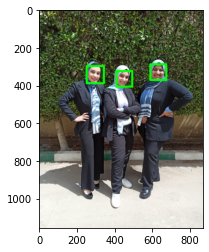

In [1]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt


def detect_faces(source: np.ndarray, scale_factor: float = 1.1, min_size: int = 50) -> list:

    src = np.copy(source)
    if len(src.shape) > 2:
        src = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
    else:
        pass

    # Create the haar cascade
    repo_root = os.path.dirname(os.getcwd())
    sys.path.append(repo_root)

    cascade_path = r"src\haarcascade_frontalface_default.xml"

    face_cascade = cv2.CascadeClassifier(cascade_path)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(
        image=src,
        scaleFactor=scale_factor,
        minNeighbors=5,
        minSize=(min_size, min_size),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    return faces


def draw_faces(source: np.ndarray, faces: list, thickness: int = 10) -> np.ndarray:
    """
    Draw rectangle around each face in the given faces list
    :return:
    """

    src = np.copy(source)

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img=src, pt1=(x, y), pt2=(x + w, y + h),
                      color=(0, 255, 0), thickness=thickness)

    return src


image = cv2.imread(r"images\faces.jfif")
# image = cv2.imread("../resources/Images/faces/IMG_8117.jpeg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

detected_faces = detect_faces(source=image)
faced_image = draw_faces(source=image_rgb, faces=detected_faces)

print(f"Found {len(detected_faces)} Faces!")
print(detected_faces)

plt.imshow(faced_image)
plt.show()

# 1.2 Eigen faces

**Eigen Faces Steps:**<br>
- Consider a set of m images of dimension N*N (training images).
- Convert these images into vectors of size N2 such that it conerted to N2*1.
-  Calculate the average of all these face vectors and subtract it from each vector.
- Find Covariance matrix by multiplying A with AT. A has dimensions N2 * M, thus AT has dimensions M * N2. When we multiplied this gives us matrix of N2 * N2, which gives us N2 eigenvectors of N2 size which is not computationally efficient to calculate. So we calculate our covariance matrix by multiplying AT and A. This gives us M * M matrix which has M (assuming M << N2) eigenvectors of size M.
- Calculate Eigenvector and Eigenvalues.
- Take the coefficient of eigenfaces and represent the training faces in the form of a vector of those coefficients.


In [2]:
# loading data and choosing training data 
import os 
import scipy.io 
import numpy as np 
import matplotlib.pyplot as plt

# A set of n persons with m images of dimension M*N (training images)
mat_contents= scipy.io.loadmat (os.path.join('allFaces.mat') )
faces=mat_contents['faces']
M=int(mat_contents['m'])
N=int(mat_contents['n'])
nfaces=np.ndarray.flatten(mat_contents['nfaces'])

# Convert each person images into vectors of size (M*N)*m such that each column is considered as one person images 
# Get the first 30 people as training data 
traindata=(faces[:,:np.sum(nfaces[:30])])
# (32256, 1898) == (M*N,64*30) where M and N are the single image dimensions 
traindata.shape


(32256, 1898)

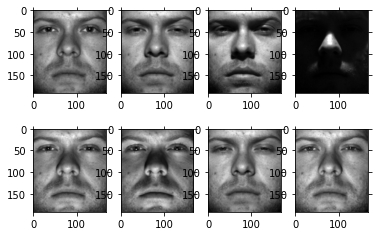

In [3]:
# Display some of normalized faces 
for i in range(8):
    img = traindata[:,i].reshape(M,N).T
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [4]:
# Now we calculate the average of all these face vectors and subtract it from each vector
meanfaces=np.mean(traindata,axis=1)
normalizedtrain=traindata-np.tile(meanfaces,(traindata.shape[1],1)).T
meanfaces.shape,normalizedtrain.shape


((32256,), (32256, 1898))

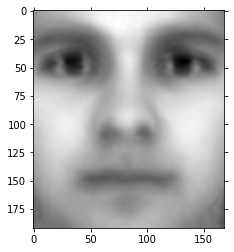

In [5]:
# Display mean face 
plt.imshow(meanfaces.reshape(M, N).T, cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

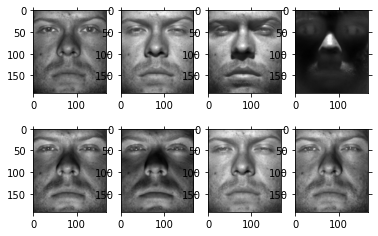

In [6]:

# Display some of normalized faces 
for i in range(8):
    img = normalizedtrain[:,i].reshape(M,N).T
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [7]:
# since each column is an image vector , we find Covariance matrix by multiplying AT with A instead of A wit AT. And which is more computationally efficient to calculate. 

# We can comute the covariance matrix by any of these methods 
#U,S,VT=np.linalg.svd(normalizedtrain,full_matrices=0)
L = ((normalizedtrain.T).dot (normalizedtrain)) /normalizedtrain.shape[1]
cov_matrix = np.cov(normalizedtrain.T)
cov_matrix = np.divide(cov_matrix,normalizedtrain.shape[1])
# find the eigenvalues and the eigenvectors of L
eigenvalues, eigenvectors = np.linalg.eig(L)
eigenvalues.shape,eigenvectors.shape

((1898,), (1898, 1898))

In [8]:
# Sort the eigen pairs in descending order:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = list([eig_pairs[index][1] for index in range(len(eigenvalues))])

In [9]:
# Find cumulative variance of each principle component
Cumulative_var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)
# get the CVF 
scores_Idx=np.where(Cumulative_var_comp_sum>=0.9)[0]
eigvectors_CVF= eigenvectors[:,scores_Idx]
# We note that the threshold condition picked some of the eigen vectors 
eigvectors_CVF.shape

(1898, 1877)

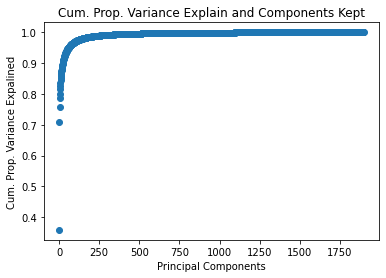

In [10]:
#Plotting the CVF graph 

# Show cumulative proportion of varaince with respect to components
# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')
plt.scatter(num_comp, Cumulative_var_comp_sum)
plt.show()

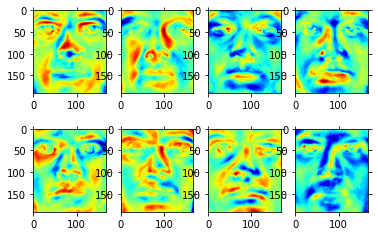

In [11]:
# Display some eigenfaces for tain data 
proj_data = (np.dot(normalizedtrain,eigvectors_CVF)).T
for i in range(8):
    img = proj_data[i].reshape(M,N).T
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')

In [12]:
## Finding weights for each traning image
print( normalizedtrain.shape)
print(proj_data.shape)
w = np.array([np.dot(proj_data,i) for i in normalizedtrain.T])
w.shape

(32256, 1898)
(1877, 32256)


(1898, 1877)

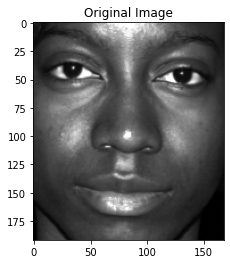

(32256,)

In [14]:
# 1.3 Projection on the eigen vectors
#first face of person 20
testface=faces[:,np.sum(nfaces[:20])]
img = testface.reshape(M,N).T
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.show()

testface.shape



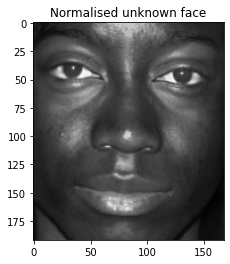

In [15]:
# Display the normalized test image
testmean = np.subtract(testface,meanfaces)

plt.imshow(testmean.reshape(M, N).T, cmap='gray')
plt.title('Normalised unknown face')
plt.show()


In [16]:

w_unknown = np.dot(proj_data,testmean)
w_unknown.shape

(1877,)

Finding the $min|W - W_{unknown}|$

(32256, 1898)


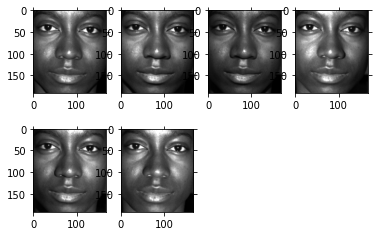

In [17]:
diff  = w - w_unknown
norms = np.linalg.norm(diff, axis=1)
normssorted=np.sort(norms)  
normssorted=normssorted[:6]
related_images=[]
for trial in range(6):
  related_images.append( np.where(norms ==normssorted[trial])[0][0]) 

print(traindata.shape)
# Display some of normalized faces 
for i in range(len(related_images)):
    img = traindata[:,related_images[i]].reshape(M,N).T
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

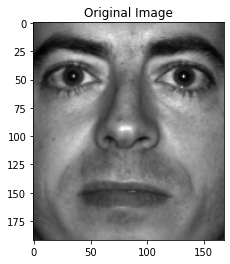

(32256,)

In [18]:

# 1.3 Projection on the eigen vectors
#first face of person 20
testface=faces[:,np.sum(nfaces[:5])]
img = testface.reshape(M,N).T
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.show()

testface.shape


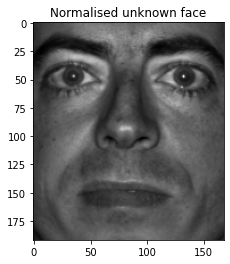

In [19]:
# Display the normalized test image
testmean = np.subtract(testface,meanfaces)

plt.imshow(testmean.reshape(M, N).T, cmap='gray')
plt.title('Normalised unknown face')
plt.show()

(32256, 1898)


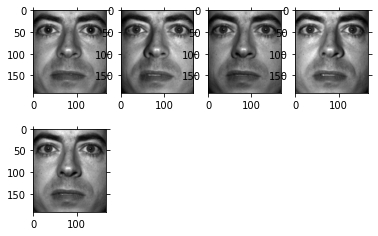

In [20]:
w_unknown = np.dot(proj_data,testmean)
diff  = w - w_unknown
norms = np.linalg.norm(diff, axis=1)
normssorted=np.sort(norms)  
normssorted=normssorted[:5]
related_images=[]
for trial in range(5):
  related_images.append( np.where(norms ==normssorted[trial])[0][0]) 

print(traindata.shape)
# Display some of normalized faces 
for i in range(len(related_images)):
    img = traindata[:,related_images[i]].reshape(M,N).T
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()